In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import random
# random.seed(123)

In [3]:
%run "/content/drive/MyDrive/ethereum-address-space-clustering/helper_functions.py"
%run "/content/drive/MyDrive/ethereum-address-space-clustering/tsne_plotter.py"
%run "/content/drive/MyDrive/ethereum-address-space-clustering/silhoutte_plotter.py"

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ethereum-address-space-clustering/data/labeled_address_data.csv").drop(columns=['Unnamed: 0'])
df.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,Entity
0,0xd26a4d3ce34eef62a5eacc1f07b6e4ed11d0d516,256,151,19.774926,0.077246,6.419212e+03,25.075046,77.681603,0.514448,1.893196e+04,...,2.704566e+03,0,0,100093.900000,254570.169509,59336.572549,213155.856128,30,60.153426,NaN
1,0x5730d1ea8624b745dde30e57d7f6e8f83fcec98a,256,56,3651.334521,14.263025,1.607194e+06,6278.101788,2706.690819,48.333765,1.378033e+06,...,8.106079e+04,0,0,639384.018182,857951.592990,156710.439216,341322.129482,24,81.758482,NaN
2,0x1efc1e054f14aa9ab69e71c8f181d4b8f4005735,256,104,14800.887683,57.815968,7.144330e+06,27907.538523,16843.009975,161.952019,7.774533e+06,...,4.573254e+05,0,0,208644.184466,621665.577772,102012.976471,573323.712422,27,95.799344,NaN
3,0xfd3a935174aeb79b8d5d3935de1188e37427561f,768,892,23397.465171,30.465449,1.463310e+05,190.535165,27432.509324,30.753934,1.863646e+05,...,5.036881e+03,3,116,69598.839506,880138.733789,33976.006519,129262.257907,11,40.338890,NaN
4,0xf27b5cf6d40531556f6e6eeb445a8c88c8f9815f,1024,9860,91026.755919,88.893316,5.362961e+07,52372.662163,92880.306328,9.419909,5.539882e+07,...,4.261448e+06,0,0,3014.540521,39706.386044,28969.567937,199625.182527,15,2625.511306,NaN


In [5]:
pipeline, processed_data = data_pipeline(df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


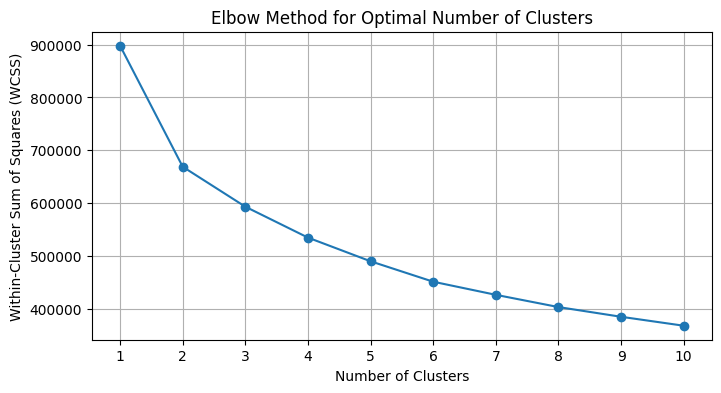

In [6]:
plot_elbow_method(processed_data, max_n_clusters=10)

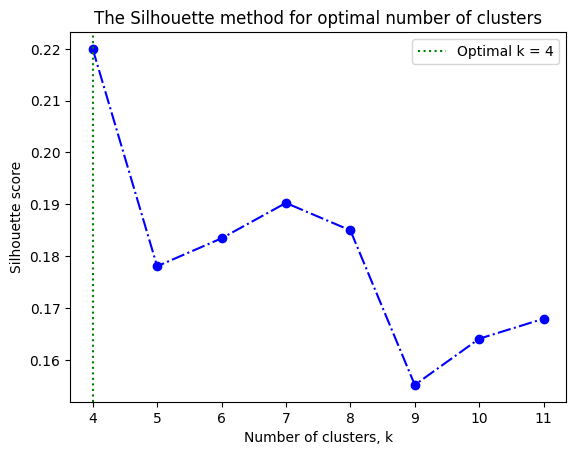

In [7]:
plot_silhouette_scores(processed_data, 4, 12)

In [8]:
range_n_clusters = [4,6,8,10]
tsne_results = calculate_tsne(processed_data, n_components=2, perplexity=50, n_iter=500, learning_rate=200)
sils = silhouette_plotter(processed_data, range_n_clusters, tsne_results)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_clusters': range(2, 9),
    'init': ['k-means++'],
    'n_init': [20,30,50],
    'max_iter': [300, 500],
    'tol': [0.001, 0.01],
    'algorithm': ['lloyd', 'elkan']
}

kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5)
grid_search.fit(processed_data)

print("Best hyperparameters: ", grid_search.best_params_)
print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))

In [33]:
clusters = make_cluster(processed_data, n_clusters=10, n_init=50, max_iter=500)
print(np.unique(clusters.labels_))

In [35]:
dataset_with_clusters = assign_cluster_to_data(df, clusters.labels_)
dataset_with_clusters.head()

,address,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,Entity,cluster
0,0xd26a4d3ce34eef62a5eacc1f07b6e4ed11d0d516,256,151,19.774926,0.077246,6.419212e+03,25.075046,77.681603,0.514448,1.893196e+04,...,0,0,100093.900000,254570.169509,59336.572549,213155.856128,30,60.153426,NaN,6
1,0x5730d1ea8624b745dde30e57d7f6e8f83fcec98a,256,56,3651.334521,14.263025,1.607194e+06,6278.101788,2706.690819,48.333765,1.378033e+06,...,0,0,639384.018182,857951.592990,156710.439216,341322.129482,24,81.758482,NaN,2
2,0x1efc1e054f14aa9ab69e71c8f181d4b8f4005735,256,104,14800.887683,57.815968,7.144330e+06,27907.538523,16843.009975,161.952019,7.774533e+06,...,0,0,208644.184466,621665.577772,102012.976471,573323.712422,27,95.799344,NaN,5
3,0xfd3a935174aeb79b8d5d3935de1188e37427561f,768,892,23397.465171,30.465449,1.463310e+05,190.535165,27432.509324,30.753934,1.863646e+05,...,3,116,69598.839506,880138.733789,33976.006519,129262.257907,11,40.338890,NaN,9
4,0xf27b5cf6d40531556f6e6eeb445a8c88c8f9815f,1024,9860,91026.755919,88.893316,5.362961e+07,52372.662163,92880.306328,9.419909,5.539882e+07,...,0,0,3014.540521,39706.386044,28969.567937,199625.182527,15,2625.511306,NaN,4


In [36]:
dataset_with_clusters["cluster"].value_counts()

,count
cluster,
1,10352
7,6647
8,5900
6,4264
2,3316
5,2789
0,825
3,822
4,607


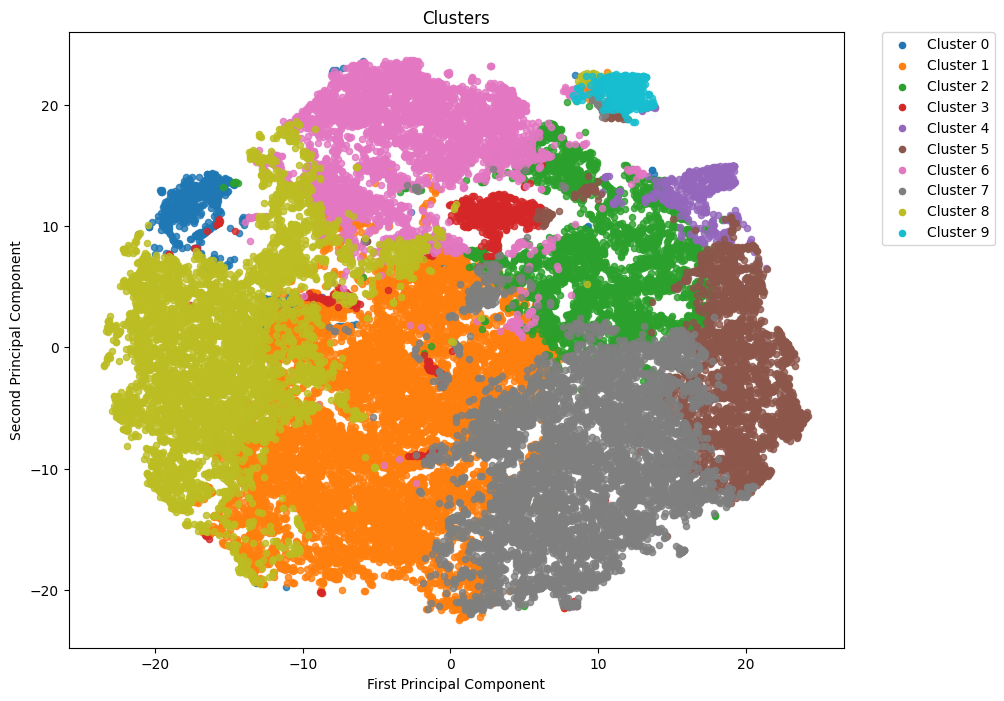

In [39]:
plot_tsne(clusters.labels_, tsne_results)

In [40]:
categories = ("Exchange", "Mining", "ICO Wallets")
colors = ("blue", "red", "green")

cluster_types = {}
for categ in categories:
    cluster_types[categ] = find_category_of_cluster(clusters, dataset_with_clusters, categ)

cl_types = list(cluster_types.values())
print(cl_types)

Exchange
Cluster num: 0, num of addresses: 1, cluster size: 825, label density: 0.1212
Cluster num: 1, num of addresses: 0, cluster size: 10352, label density: 0.0000
Cluster num: 2, num of addresses: 3, cluster size: 3316, label density: 0.0905
Cluster num: 3, num of addresses: 0, cluster size: 822, label density: 0.0000
Cluster num: 4, num of addresses: 93, cluster size: 607, label density: 15.3213
Cluster num: 5, num of addresses: 5, cluster size: 2789, label density: 0.1793
Cluster num: 6, num of addresses: 0, cluster size: 4264, label density: 0.0000
Cluster num: 7, num of addresses: 2, cluster size: 6647, label density: 0.0301
Cluster num: 8, num of addresses: 0, cluster size: 5900, label density: 0.0000
Cluster num: 9, num of addresses: 8, cluster size: 394, label density: 2.0305
Mining
Cluster num: 0, num of addresses: 0, cluster size: 825, label density: 0.0000
Cluster num: 1, num of addresses: 0, cluster size: 10352, label density: 0.0000
Cluster num: 2, num of addresses: 4, 

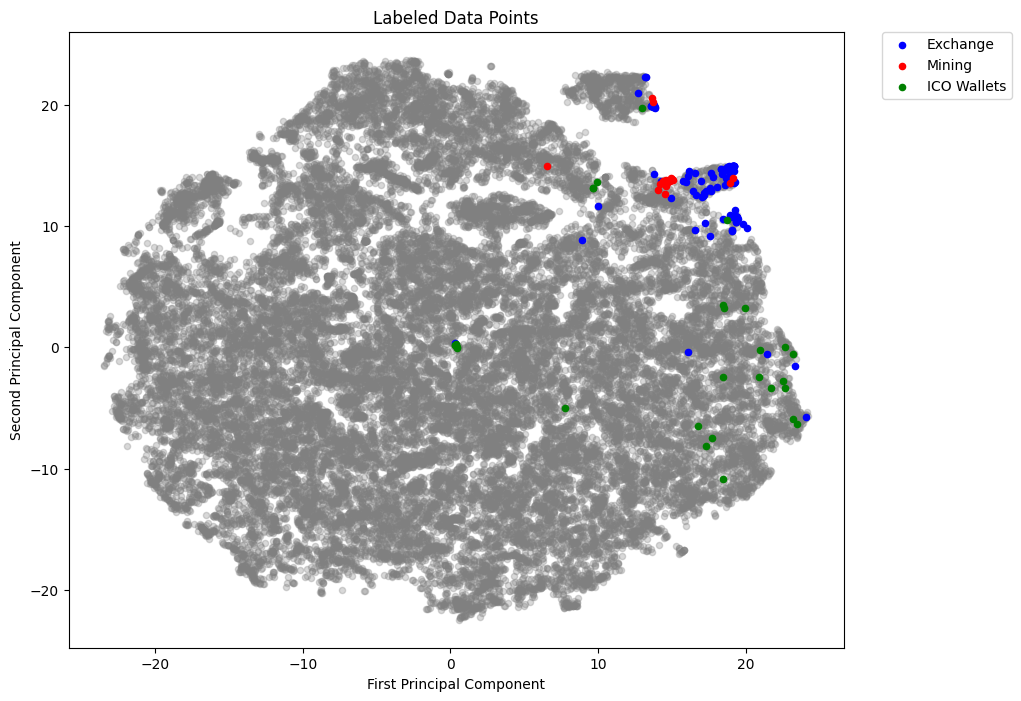

In [41]:
df_label = df[df["Entity"].notnull()]
df_label = df_label[["address", "Entity"]]
plot_tsne_with_labels(tsne_results, df, df_label, categories, colors)

Plotting Cluster 4 with label 'Exchange' and color 'blue'. Size: 607
Plotting Cluster 5 with label 'ICO Wallets' and color 'green'. Size: 2789


<ipython-input-50-c0a775a3a386>:40: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


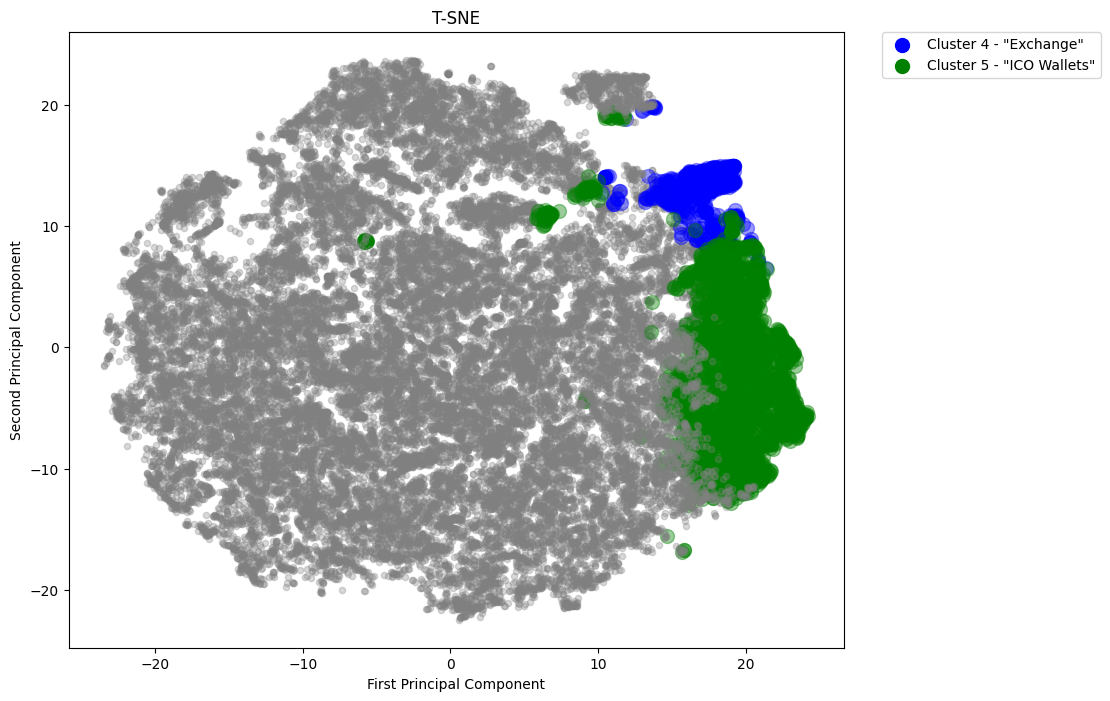

In [51]:
plot_tsne_with_labeled_clusters(tsne_results, clusters, cl_types, categories, colors)